In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
import matplotlib.pyplot as plt
from rff.layers import GaussianEncoding

Using Scenario B, 15s dataset for classifcation on traffic type (7 classes)

In [2]:
df = pd.read_csv(r"C:\Users\smbm2\projects\TrafficFlowForecasting\warins_experiments\data\Scenario B\TimeBasedFeatures-Dataset-15s-AllinOne.csv") # personal
# df = pd.read_csv(r"C:\python\research\csv_datasets\Scenario B\TimeBasedFeatures-Dataset-15s-AllinOne.csv") # for IR

df.head()

,Unnamed: 0,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,...,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1
0,0,9368711.0,16.0,4.0,1564818.0,1549373.0,190205.285714,203290.456522,389822.391917,370323.719754,...,267600.198443,1871488.0,1.983656e+06,2195089.0,1.832197e+05,1234883.0,1420565.0,1523088.0,161096.539275,CHAT
1,1,7340238.0,18.0,4.0,1567554.0,1527893.0,165686.977273,186914.846154,317267.548742,304370.651301,...,221462.862028,1491627.0,3.572433e+06,5653239.0,2.942704e+06,1131498.0,1324636.0,1517774.0,273138.379008,CHAT
2,2,4644225.0,29.0,15.0,1270547.0,1079974.0,165865.178571,195302.130435,329473.126261,300492.588227,...,217475.425246,1758922.0,1.758922e+06,1758922.0,0.000000e+00,1079974.0,1079974.0,1079974.0,0.000000,CHAT
3,3,4978735.0,19.0,8.0,2492050.0,2457286.0,239543.250000,276596.388889,612435.304238,628339.573544,...,436959.716436,1710925.0,2.382905e+06,3054885.0,9.503232e+05,1346073.0,1894031.5,2441990.0,774930.342317,CHAT
4,4,11838189.0,19.0,10.0,3094089.0,3093543.0,243766.500000,295954.725000,599721.781709,625632.703972,...,436129.639296,1747431.0,2.400446e+06,3240696.0,6.232744e+05,1394455.0,1983227.0,3042717.0,725987.829075,CHAT


In [3]:
df = df.drop(columns=['Unnamed: 0'])
df.head()

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1
0,9368711.0,16.0,4.0,1564818.0,1549373.0,190205.285714,203290.456522,389822.391917,370323.719754,10.353612,...,267600.198443,1871488.0,1.983656e+06,2195089.0,1.832197e+05,1234883.0,1420565.0,1523088.0,161096.539275,CHAT
1,7340238.0,18.0,4.0,1567554.0,1527893.0,165686.977273,186914.846154,317267.548742,304370.651301,11.580006,...,221462.862028,1491627.0,3.572433e+06,5653239.0,2.942704e+06,1131498.0,1324636.0,1517774.0,273138.379008,CHAT
2,4644225.0,29.0,15.0,1270547.0,1079974.0,165865.178571,195302.130435,329473.126261,300492.588227,11.412022,...,217475.425246,1758922.0,1.758922e+06,1758922.0,0.000000e+00,1079974.0,1079974.0,1079974.0,0.000000,CHAT
3,4978735.0,19.0,8.0,2492050.0,2457286.0,239543.250000,276596.388889,612435.304238,628339.573544,8.034169,...,436959.716436,1710925.0,2.382905e+06,3054885.0,9.503232e+05,1346073.0,1894031.5,2441990.0,774930.342317,CHAT
4,11838189.0,19.0,10.0,3094089.0,3093543.0,243766.500000,295954.725000,599721.781709,625632.703972,7.602514,...,436129.639296,1747431.0,2.400446e+06,3240696.0,6.232744e+05,1394455.0,1983227.0,3042717.0,725987.829075,CHAT


In [4]:
le = LabelEncoder()
df['class1'] = le.fit_transform(df['class1'])
df.head()

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1
0,9368711.0,16.0,4.0,1564818.0,1549373.0,190205.285714,203290.456522,389822.391917,370323.719754,10.353612,...,267600.198443,1871488.0,1.983656e+06,2195089.0,1.832197e+05,1234883.0,1420565.0,1523088.0,161096.539275,1
1,7340238.0,18.0,4.0,1567554.0,1527893.0,165686.977273,186914.846154,317267.548742,304370.651301,11.580006,...,221462.862028,1491627.0,3.572433e+06,5653239.0,2.942704e+06,1131498.0,1324636.0,1517774.0,273138.379008,1
2,4644225.0,29.0,15.0,1270547.0,1079974.0,165865.178571,195302.130435,329473.126261,300492.588227,11.412022,...,217475.425246,1758922.0,1.758922e+06,1758922.0,0.000000e+00,1079974.0,1079974.0,1079974.0,0.000000,1
3,4978735.0,19.0,8.0,2492050.0,2457286.0,239543.250000,276596.388889,612435.304238,628339.573544,8.034169,...,436959.716436,1710925.0,2.382905e+06,3054885.0,9.503232e+05,1346073.0,1894031.5,2441990.0,774930.342317,1
4,11838189.0,19.0,10.0,3094089.0,3093543.0,243766.500000,295954.725000,599721.781709,625632.703972,7.602514,...,436129.639296,1747431.0,2.400446e+06,3240696.0,6.232744e+05,1394455.0,1983227.0,3042717.0,725987.829075,1


In [9]:
df['class1'].value_counts()

6    5097
0    5000
2    2950
1    2086
4    1928
5     957
3     740
Name: class1, dtype: int64

In [10]:
df.isna().any()

duration              False
total_fiat            False
total_biat            False
min_fiat              False
min_biat              False
max_fiat              False
max_biat              False
mean_fiat             False
mean_biat             False
flowPktsPerSecond     False
flowBytesPerSecond    False
min_flowiat           False
max_flowiat           False
mean_flowiat          False
std_flowiat           False
min_active            False
mean_active           False
max_active            False
std_active            False
min_idle              False
mean_idle             False
max_idle              False
std_idle              False
class1                False
dtype: bool

### Try standardizing before next time

In [5]:
class vpnDataset(Dataset):
    def __init__(self, df, target = 'class1'):
        self.n = df.shape[0]
        
        self.y = df[target].astype(np.int64).values

        self.x = df.drop(columns=[target]).astype(np.float32).values

    def __len__(self):
        return self.n
    
    def __getitem__(self, index):
        return self.x[index], self.y[index]


In [6]:
vpn_dataset = vpnDataset(df)

In [13]:
len(vpn_dataset)

18758

In [14]:
vpn_dataset[:5]

(array([[9.36871100e+06, 1.60000000e+01, 4.00000000e+00, 1.56481800e+06,
         1.54937300e+06, 1.90205281e+05, 2.03290453e+05, 3.89822406e+05,
         3.70323719e+05, 1.03536119e+01, 4.80268848e+03, 4.00000000e+00,
         1.52308800e+06, 9.75907422e+04, 2.67600188e+05, 1.87148800e+06,
         1.98365638e+06, 2.19508900e+06, 1.83219703e+05, 1.23488300e+06,
         1.42056500e+06, 1.52308800e+06, 1.61096547e+05],
        [7.34023800e+06, 1.80000000e+01, 4.00000000e+00, 1.56755400e+06,
         1.52789300e+06, 1.65686984e+05, 1.86914844e+05, 3.17267562e+05,
         3.04370656e+05, 1.15800056e+01, 4.34018604e+03, 4.00000000e+00,
         1.51777400e+06, 8.73837891e+04, 2.21462859e+05, 1.49162700e+06,
         3.57243300e+06, 5.65323900e+06, 2.94270400e+06, 1.13149800e+06,
         1.32463600e+06, 1.51777400e+06, 2.73138375e+05],
        [4.64422500e+06, 2.90000000e+01, 1.50000000e+01, 1.27054700e+06,
         1.07997400e+06, 1.65865172e+05, 1.95302125e+05, 3.29473125e+05,
        

In [7]:
train_size = int(0.7*len(vpn_dataset))
print(train_size)
test_size = len(vpn_dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(vpn_dataset, [train_size, test_size])
print(len(train_dataset), len(test_dataset))

13130
13130 5628


In [8]:
batch_size = 256
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True) 

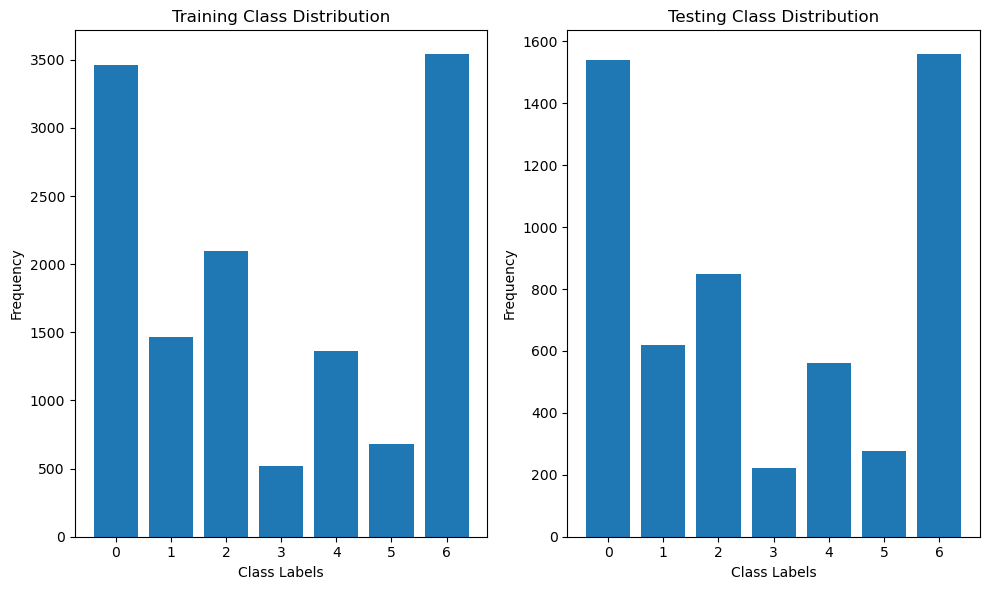

In [15]:
#to be sure that the distributions of classes are close to the same (random_split is actually randomly splitting)

from collections import Counter

train_labels = []
test_labels = []
for input, labels in train_dataloader:
    train_labels.extend(labels.flatten().tolist())

for input, labels in test_dataloader:
    test_labels.extend(labels.flatten().tolist())

train_distribution = Counter(train_labels)
test_distribution = Counter(test_labels)


plt.figure(figsize=(10, 6))

# Plotting training distribution
plt.subplot(1, 2, 1)
plt.bar(train_distribution.keys(), train_distribution.values())
plt.title('Training Class Distribution')
plt.xlabel('Class Labels')
plt.ylabel('Frequency')

# Plotting testing distribution
plt.subplot(1, 2, 2)
plt.bar(test_distribution.keys(), test_distribution.values())
plt.title('Testing Class Distribution')
plt.xlabel('Class Labels')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [14]:
for batch_idx, (inputs, targets) in enumerate(train_dataloader):
    # `inputs` will contain the input features for the current batch
    # `targets` will contain the corresponding target labels

    # Print the batch index and the sizes of inputs and targets
    print(f"Batch Index: {batch_idx}")
    print("Input sizes:", inputs.size())
    print("Target sizes:", targets.size())

    # You can also print the actual data if you want to see the values
    print("Inputs:")
    print(inputs)
    print("Targets:")
    print(targets)

Batch Index: 0
Input sizes: torch.Size([256, 23])
Target sizes: torch.Size([256])
Inputs:
tensor([[ 1.4998e+07,  1.0700e+02,  2.0000e+00,  ...,  0.0000e+00,
         -1.0000e+00,  0.0000e+00],
        [ 1.0538e+07,  5.0000e+00,  1.3000e+01,  ...,  9.2895e+06,
          9.2895e+06,  0.0000e+00],
        [ 1.4870e+07,  6.0600e+02, -1.0000e+00,  ...,  1.3700e+07,
          1.3737e+07,  0.0000e+00],
        ...,
        [ 1.4999e+07,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
         -1.0000e+00,  0.0000e+00],
        [ 4.3000e+01, -1.0000e+00, -1.0000e+00,  ...,  0.0000e+00,
         -1.0000e+00,  0.0000e+00],
        [ 1.4578e+07,  5.8000e+01,  1.0000e+00,  ...,  1.4400e+07,
          1.4403e+07,  0.0000e+00]])
Targets:
tensor([6., 0., 2., 0., 0., 3., 6., 6., 0., 0., 5., 1., 6., 6., 6., 6., 6., 1.,
        1., 6., 6., 0., 5., 6., 0., 0., 0., 2., 6., 6., 1., 6., 0., 0., 0., 2.,
        3., 3., 2., 1., 0., 0., 5., 2., 6., 6., 6., 6., 6., 6., 1., 0., 0., 6.,
        5., 2., 3., 0., 0., 0

# Interpretable Transformer Design

## 

In [9]:
class SelfAttention(nn.Module):
    def __init__(self, embed_size, heads):
        super(SelfAttention, self).__init__()

        self.embed_size = embed_size
        self.heads = heads
        self.head_dim = embed_size // heads
        assert(self.head_dim * heads == embed_size), "Embed size needs to be div by heads"
        self.values = nn.Linear(self.head_dim, self.head_dim, bias=False)
        self.keys =nn.Linear(self.head_dim, self.head_dim, bias=False)
        self.queries = nn.Linear(self.head_dim, self.head_dim, bias=False)
        self.fc_out = nn.Linear(heads*self.head_dim, embed_size)


    def forward(self, values, keys, query):
        N = query.shape[0]
        value_len, key_len, query_len = values.shape[1], keys.shape[1], query.shape[1]

        values = values.reshape(N, value_len, self.heads, self.head_dim)
        keys = keys.reshape(N, key_len, self.heads, self.head_dim)
        queries = query.reshape(N, key_len, self.heads, self.head_dim)
        energy = torch.einsum("nqhd,nkhd->nhqk", [queries, keys])
        # print('energy shape ', energy.shape)

        # if mask is not None:
        #     energy = energy.masked_fill(mask == 0, float("-1e20"))

        attention = torch.softmax(energy / (self.embed_size ** (1/2)), dim=3) #(batch_size, head_dim, n_features, n_features)
        # print('attention shape ', attention.shape)

        # Calculate simplified attention scores
        avg_attention = attention.mean(dim=1)  # Average across heads
        avg_attention = avg_attention.mean(dim=1)  # Average across positions

        out = torch.einsum("nhql,nlhd->nqhd", [attention, values]).reshape(N, query_len, self.heads*self.head_dim) #(batch_size, n_features, embed_size)
        # print('values shape', values.shape)
        # print('output shape', out.shape)
        out = self.fc_out(out)


        return out, avg_attention
    
class TransformerBlock(nn.Module):
    def __init__(self, embed_size, heads, dropout, forward_expansion):
        super(TransformerBlock, self).__init__()

        self.attention = SelfAttention(embed_size, heads)
        self.norm1 = nn.LayerNorm(embed_size)
        self.norm2 = nn.LayerNorm(embed_size)

        self.feed_forward = nn.Sequential(nn.Linear(embed_size, forward_expansion*embed_size),
                                          nn.ReLU(),
                                          nn.Linear(forward_expansion*embed_size, embed_size)
                                          )
        self.dropout = nn.Dropout(dropout)

    def forward(self,value,key,query):
        attention, avg_attention = self.attention(value, key, query)
        x = self.dropout(self.norm1(attention + query))
        forward = self.feed_forward(x)
        out = self.dropout(self.norm2(forward + x))
        return out, avg_attention

class Encoder(nn.Module):
    def __init__(self,
                 embed_size,
                 num_layers,
                 heads,
                 forward_expansion,
                 encoder_dropout
    ):
        super(Encoder, self).__init__()
        
        self.layers = nn.ModuleList(
            [
                TransformerBlock(
                    embed_size,
                    heads,
                    dropout=encoder_dropout,
                    forward_expansion=forward_expansion
                )
                for _ in range(num_layers)
            ]
        )
        self.avg_attention = None

    def forward(self, x):
        for layer in self.layers:
            #running embeddings through transformer block
            #keys, values, and query are all the same initially (x)
            x, self.avg_attention = layer(x, x, x)
     
        return x #same dimensions as going in 


In [10]:
class Embeddings(nn.Module):
    def __init__(self, sigma, embed_size, input_size, embedding_dropout, n_features, rff_on):
        super(Embeddings, self).__init__()

        self.rff_on = rff_on

        if self.rff_on:
            self.rffs = nn.ModuleList([GaussianEncoding(sigma=sigma, input_size=input_size, encoded_size=embed_size//2) for x in range(n_features)])
            self.dropout = nn.Dropout(embedding_dropout)
            self.mlp_in = embed_size
        else:
            self.mlp_in = input_size

        self.embeddings = nn.ModuleList([nn.Linear(in_features=self.mlp_in, out_features=embed_size) for x in range(n_features)])

    def forward(self, x):
        x = x.unsqueeze(2) #(batch_size, n_features) -> (batch_size, n_features, 1)
        rff_vectors = []
        if self.rff_on:
            for i, r in enumerate(self.rffs):
                input = x[:,i,:]
                out = r(input)
                rff_vectors.append(out)
        
            x = torch.stack(rff_vectors, dim=1)
        
        embeddings = []
        for i, e in enumerate(self.embeddings):
            goin_in = x[:,i,:]
            goin_out = e(goin_in)
            embeddings.append(goin_out)

        x = torch.stack(embeddings, dim=1)

        return x

In [11]:
class classificationHead(nn.Module):
    def __init__(self, n_features, embed_size, dropout, num_target_classes):
        super(classificationHead, self).__init__()
        
        #flattening the embeddings out so each sample in batch is represented with a 460 dimensional vector
        self.n_features = n_features*embed_size
        self.lin1 = nn.Linear(self.n_features, self.n_features)
        self.drop = nn.Dropout(dropout)
        self.lin2 = nn.Linear(self.n_features, num_target_classes)
        
        self.relu = nn.ReLU()
        # self.softmax = nn.Softmax()
        self.initialize_weights()

    def initialize_weights(self): #he_initialization.
        torch.nn.init.kaiming_normal_(self.lin1.weight, nonlinearity='relu')
        torch.nn.init.zeros_(self.lin1.bias)

        torch.nn.init.kaiming_normal_(self.lin2.weight, nonlinearity='relu')
        torch.nn.init.zeros_(self.lin2.bias)

    def forward(self, x):

        x= torch.reshape(x, (-1, self.n_features))

        x = self.lin1(x)
        x = self.relu(x)
        x = self.drop(x)
        x = self.lin2(x)
        # x = self.softmax(x)
        # print(x.shape)
  
        return x

In [12]:
class LSTM_aggregation(nn.Module):
    def __init__(self, input_size, num_layers, batch_sz):
        super(LSTM_aggregation, self).__init__()
        
        self.embed_size = input_size
        self.num_layers = num_layers
        self.batch_sz = batch_sz
        self.aggregation = nn.LSTM(
                input_size = self.embed_size,
                hidden_size = self.embed_size,
                num_layers = self.num_layers,
                batch_first = True
            )
    def forward(self, x):
        x, _ = self.aggregation(x)
        
        return x

In [13]:
class vpnClassifier(nn.Module):
    def __init__(self, 
                 rff_on = True,
                 sigma=4,
                 embed_size=20,
                 input_size=1,
                 embedding_dropout = 0,
                 n_features=23,
                 num_layers=2,
                 heads=4,
                 forward_expansion=4,
                 encoder_dropout=0,
                 aggregation_on = True,
                 lstm_layers=1,
                 batch_sz = 256,
                 num_target_classes = 7,
                 classification_dropout = 0
                 ):
        super(vpnClassifier, self).__init__()
        self.aggregation_on = aggregation_on

        self.embeddings = Embeddings(rff_on=rff_on, sigma=sigma, embed_size=embed_size, input_size=input_size, embedding_dropout=embedding_dropout, n_features=n_features)
        self.encoder = Encoder(embed_size=embed_size, num_layers=num_layers, heads=heads, forward_expansion=forward_expansion, encoder_dropout=encoder_dropout)
        if self.aggregation_on:
            self.aggregation = LSTM_aggregation(input_size=embed_size, num_layers=lstm_layers, batch_sz=batch_sz)
        self.classifying_head = classificationHead(n_features=n_features, embed_size=embed_size, dropout=classification_dropout, num_target_classes=num_target_classes)
        
    def forward(self, x):
        x = self.embeddings(x)

        x = self.encoder(x)

        if self.aggregation_on:
            x = self.aggregation(x)
            
        x = self.classifying_head(x)
        return x


In [14]:
def train(dataloader, model, loss_fn, optimizer):
    model.train()
    total_loss = 0
    total_correct = 0
    total_samples = 0

    for batch_idx, (inputs, targets) in enumerate(dataloader):
        # print(batch_idx, inputs, targets)
        pred = model(inputs)
        # print(pred)
        # print(targets)
        # print(pred.squeeze(0))
        loss = loss_fn(pred, targets)
        total_loss+= loss.item()

        # Calculate accuracy
        y_pred_softmax = torch.log_softmax(pred, dim =1)
        _, y_pred_labels = torch.max(y_pred_softmax, dim=1)
        total_correct += (y_pred_labels == targets).sum().item()
        total_samples += targets.size(0)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    avg_loss = total_loss/len(dataloader)
    accuracy = total_correct / total_samples
    return avg_loss, accuracy
    

def test(dataloader, model, loss_fn):
  model.eval()
  tot = 0
  total_correct = 0
  total_samples = 0
  with torch.no_grad():
    for batch_idx, (inputs, targets) in enumerate(dataloader):
      #compute prediction error
      pred = model(inputs)
      test_loss = loss_fn(pred, targets)
      tot += test_loss

      # Calculate accuracy
      y_pred_softmax = torch.log_softmax(pred, dim =1)
      _, y_pred_labels = torch.max(y_pred_softmax, dim=1)
      total_correct += (y_pred_labels == targets).sum().item()
      total_samples += targets.size(0)

  avg = tot/len(dataloader)
  accuracy = total_correct / total_samples

  return avg, accuracy

# EXPERIMENTS

Epoch 1/20, Train Loss: 0.9391, Test Loss: 0.7237, Train Accuracy: 0.6778, Test Accuracy: 0.7177
Epoch 2/20, Train Loss: 0.6951, Test Loss: 0.6689, Train Accuracy: 0.7418, Test Accuracy: 0.7472
Epoch 3/20, Train Loss: 0.6478, Test Loss: 0.6440, Train Accuracy: 0.7551, Test Accuracy: 0.7587
Epoch 4/20, Train Loss: 0.6402, Test Loss: 0.6394, Train Accuracy: 0.7621, Test Accuracy: 0.7672
Epoch 5/20, Train Loss: 0.6209, Test Loss: 0.6472, Train Accuracy: 0.7685, Test Accuracy: 0.7536
Epoch 6/20, Train Loss: 0.6009, Test Loss: 0.6283, Train Accuracy: 0.7707, Test Accuracy: 0.7656
Epoch 7/20, Train Loss: 0.6056, Test Loss: 0.6195, Train Accuracy: 0.7743, Test Accuracy: 0.7656
Epoch 8/20, Train Loss: 0.5761, Test Loss: 0.6119, Train Accuracy: 0.7823, Test Accuracy: 0.7557
Epoch 9/20, Train Loss: 0.5671, Test Loss: 0.6383, Train Accuracy: 0.7832, Test Accuracy: 0.7701
Epoch 10/20, Train Loss: 0.5709, Test Loss: 0.6083, Train Accuracy: 0.7848, Test Accuracy: 0.7672
Epoch 11/20, Train Loss: 0.56

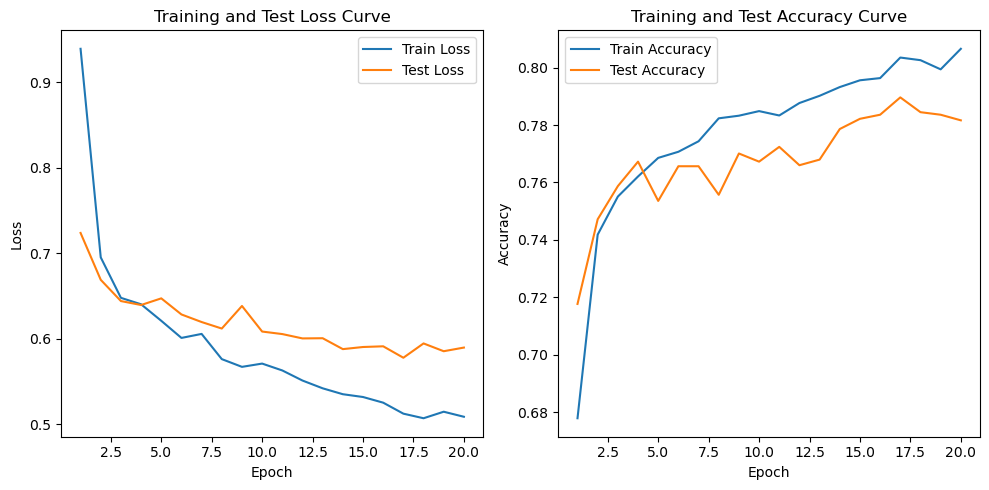

Best accuracy: 0.7896233120113717


IndexError: too many indices for tensor of dimension 2

In [44]:
#No RFF, No aggregation, 1 encoder layer, no regularization. VERY BASIC
model = vpnClassifier(rff_on=False, num_layers=1, aggregation_on=False, heads=1)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.RMSprop(params=model.parameters(), lr=0.0001, momentum=0.9)

epochs = 20
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []
all_attention_scores = []
for t in range(epochs):
  train_loss, train_accuracy= train(train_dataloader, model, loss_fn, optimizer)
  test_loss, test_accuracy = test(test_dataloader, model, loss_fn)
  train_losses.append(train_loss)
  train_accuracies.append(train_accuracy)
  test_losses.append(test_loss)
  test_accuracies.append(test_accuracy)
  print(f"Epoch {t+1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")
  
  # print('attention scores', model.encoder.avg_attention)

  total_attention = model.encoder.avg_attention.sum(dim=0)
  # print('attention scores averaged across batch ', total_attention/len(train_dataloader.dataset))
  all_attention_scores.append(total_attention.tolist())
  model.encoder.avg_attention = None


# Plotting the loss curves
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Curve')
plt.legend()

# Plotting the accuracy curves
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, epochs+1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Best accuracy: {max(test_accuracies)}")



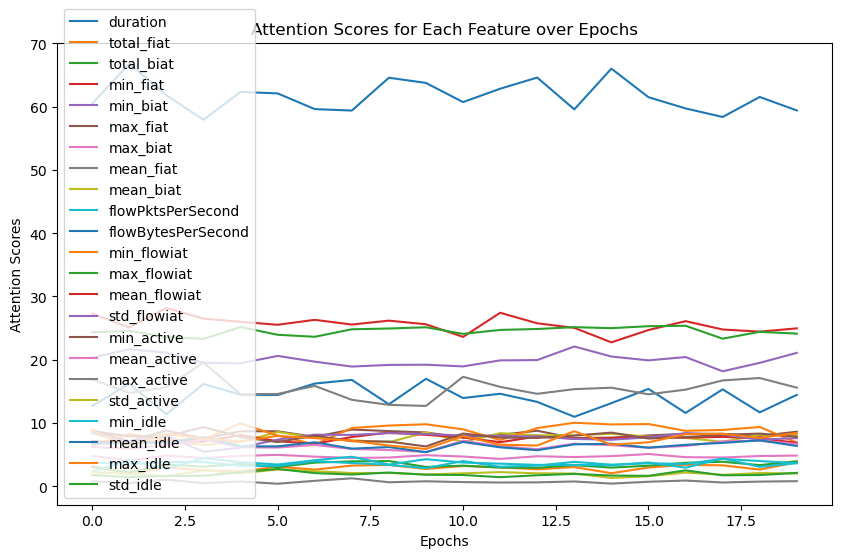

duration: 59.37849426269531
min_fiat: 24.953500747680664
max_flowiat: 24.123594284057617
min_biat: 21.081552505493164
max_active: 15.584203720092773
flowBytesPerSecond: 14.450002670288086
max_fiat: 8.634376525878906
max_idle: 8.426129341125488
mean_biat: 8.11204719543457
min_active: 7.833776473999023


In [49]:
# Plot attention scores for each feature over epochs
plt.figure(figsize=(10, 6))

for feature_idx in range(all_attention_scores.shape[1]):
    plt.plot(all_attention_scores[:, feature_idx], label=df.drop("class1", axis=1).columns[feature_idx])

plt.xlabel('Epochs')
plt.ylabel('Attention Scores')
plt.title('Attention Scores for Each Feature over Epochs')
plt.legend(loc = 'lower left')
plt.show()

last_epoch_attention_scores = all_attention_scores[-1]
top_scores, top_indices = torch.topk(last_epoch_attention_scores, k=10)

# Display the top 10 attention scores and their corresponding feature indices
for i in range(10):
    print(f"{df.drop('class1', axis=1).columns[int(top_indices[i])]}: {top_scores[i]}")